In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from collections import defaultdict, Counter
from os import listdir
from razdel import tokenize

In [2]:
# !mkdir clean_files
# !mv files/1* clean_files/
# !mv files/2* clean_files/
# !mv files/3* clean_files/

In [3]:
len(listdir('clean_files'))

8109

In [4]:
def parse_hubs(raw_hubs):
    hub_list = [hub_str.strip().lower() for hub_str in raw_hubs.strip().replace(', ', '').split('\n')]
    return [hub for hub in hub_list if hub]

def get_like_value(like_str):
    if len(like_str) == 1:
        return 1 if like_str == '+' else -1
    if like_str[0] != '+':
        return -int(like_str[1:])
    return int(like_str[1:])

In [5]:
categories = [
    "научно-популярное", "гаджеты", "программирование",
    "космонавтика", "информационная безопасность", "it-компании", "компьютерное железо",
    "разработка веб-сайтов", "diy или сделай сам", "будущее здесь"
]

def check_good(hubs, counter):
    cat = None
    for hub in file_hubs:
        if hub in categories:
            cat = hub
            break
    
    if cat is None:
        return False
    
    counter[cat] += 1
    return True

In [6]:
count_by_hub = Counter()
unique_counter = Counter()
likes = []
hubs_cnt = []
text_lengthes = []

count_good = 0

for filename in tqdm(listdir('clean_files')):
    one_file = pickle.load(open(f'clean_files/{filename}', 'rb'))
    file_hubs = parse_hubs(one_file['hubs'])
    for hub in file_hubs:
        count_by_hub[hub] += 1
    if check_good(file_hubs, unique_counter):
        count_good += 1
    hubs_cnt.append(len(file_hubs))
    text_lengthes.append(len(list(tokenize(one_file["text"]))))
    likes.append(get_like_value(one_file['likes']))

In [7]:
one_file

{'id': 385847,
 'status': 'ok',
 'title': 'На складах Amazon теперь работает 30 тысяч роботов вместо 15 тысяч (+ фото со складов компании)',
 'text': '\nПод стеллажами можно видеть готовых к работе роботов\n\nКомпания Amazon менее, чем за год удвоила количество роботизированных систем Kiva, работающих на своих складах. На днях компания опубликовала информацию о том, сколько роботов работает на ее складах, оказалось, что число таких систем выросло уже до 30 тысяч.\n\nОдин из высокопоставленных менеджеров компании уже заявил, что роботы выполняют свою работу весьма эффективно, обеспечивая оптимальное использование складских помещений. При этом роботы, зачастую, заменяют людей на складах, что позволяет экономить на заработной плате, соцпакетах и тому подобных операционных затратах, связанных с персоналом. \n\n\n\nРазработчиком роботов Kiva является компания Kiva Systems, которую Amazon выкупила еще в 2012 году за $775 миллионов. Такие затраты могут казаться неоправданно большими, но для A

In [8]:
print(len(text_lengthes))

8109


In [9]:
print("Количество текстов:", len(listdir('clean_files')))
print("Средняя длинна текста в токенах:", round(np.mean(text_lengthes), 2))
print()
print("Среднее количество лайков:", np.mean(likes))
print("Медиана лайков:", np.median(likes))
print("Медиана тегов:", np.median(hubs_cnt))

Количество текстов: 8109
Средняя длинна текста в токенах: 1584.8

Среднее количество лайков: 18.8178567024294
Медиана лайков: 13.0
Медиана тегов: 2.0


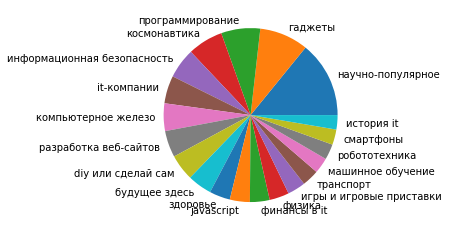

In [10]:
top_categories = sorted([(count, hub) for hub, count in count_by_hub.items()], reverse=True)[:20]

values = [x[0] for x in top_categories]
labels = [x[1] for x in top_categories]

plt.pie(values, labels=labels)
plt.plot()

print()

In [11]:
print(top_categories)

[(953, 'научно-популярное'), (613, 'гаджеты'), (490, 'программирование'), (443, 'космонавтика'), (379, 'информационная безопасность'), (348, 'it-компании'), (346, 'компьютерное железо'), (333, 'разработка веб-сайтов'), (329, 'diy или сделай сам'), (305, 'будущее здесь'), (260, 'здоровье'), (251, 'javascript'), (247, 'финансы в it'), (246, 'физика'), (226, 'игры и игровые приставки'), (212, 'транспорт'), (197, 'машинное обучение'), (195, 'робототехника'), (192, 'смартфоны'), (180, 'история it')]


In [12]:
good_categories = list(map(lambda x: x[1],top_categories[:10]))
print(good_categories)

['научно-популярное', 'гаджеты', 'программирование', 'космонавтика', 'информационная безопасность', 'it-компании', 'компьютерное железо', 'разработка веб-сайтов', 'diy или сделай сам', 'будущее здесь']


In [13]:
good_count = 0

for filename in listdir('clean_files'):
    one_file = pickle.load(open(f'clean_files/{filename}', 'rb'))
    file_hubs = parse_hubs(one_file['hubs'])
    good_count += any(hub in good_categories for hub in file_hubs)
print(good_count)

3685


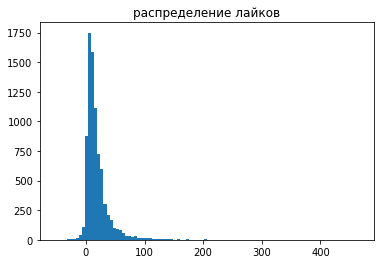

In [14]:
plt.hist(likes, bins=100)
plt.title("распределение лайков")
print()

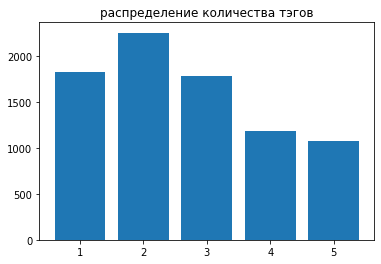

In [15]:
cnt = Counter(hubs_cnt)
hubs_groups = cnt.items()

labels = [x[0] for x in hubs_groups]
values = [x[1] for x in hubs_groups]

plt.bar(labels, values)
plt.title("распределение количества тэгов")
print()

In [16]:
pos_cnt = cnt = Counter()
for filename in tqdm(listdir('pos')):
    with open(f'pos/{filename}', 'r') as one_file:
        for line in one_file.readlines():
            if len(line) > 1:
                vals = line.split('\t')
                pos = vals[2]
                pos_cnt[pos] +=1

## Части речи

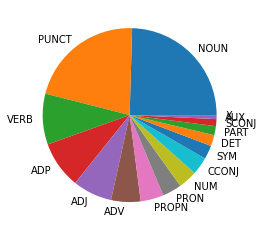

In [17]:
top_categories = sorted([(count, hub) for hub, count in pos_cnt.items()], reverse=True)

values = [x[0] for x in top_categories]
labels = [x[1] for x in top_categories]

plt.pie(values, labels=labels)
plt.plot()

print()

## Тематические классы 

Количество документов хотя бы с одной темой: 3685


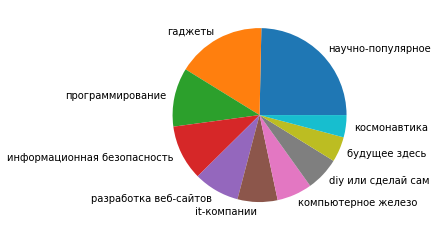

In [18]:
top_categories = sorted([(count, hub) for hub, count in unique_counter.items()], reverse=True)
values = [x[0] for x in top_categories]
labels = [x[1] for x in top_categories]

plt.pie(values, labels=labels)
plt.plot()

print("Количество документов хотя бы с одной темой:", count_good)